## Aufgabe 1 - Lineare Regression und Korrelationskoeffizient
Berechnung der Parameter mit Hilfe des Paketes [SciPy](https://scipy.org/).

In [39]:
import numpy as np
from scipy import stats

X = np.array([2.6, 3.6, 3.8, 4.8, 5.6, 6.4, 7.2, 8.0])
Y = np.array([420, 440, 480, 480, 640, 800, 820, 960])

# Berechnung aller benötigten Paramter mit einem Befehl. Die Ausgabe
# der Regressionsgerade soll hier die positive Korrelation visualisieren.
# m: Steigung (slope), a: y-Achsenabschnitt (intercept), r: Korrelationskoeffizient, 
# p: p-Value, e: Fehler
m, a, r, p, e = stats.linregress(X,Y)

# a) Koeffizienten der Regressionsgeraden, Resultate auf
# drei Nachkommastellen ausgeben
print("Steigung:", "%.3f " % m)
print("Achsenabschnitt:", "%.3f " % a)
# b) Korrelationskoeffizient
print("Korrelationskoeffizient:", "%.3f " % r)


Steigung: 105.873 
Achsenabschnitt: 74.167 
Korrelationskoeffizient: 0.965 


## Aufgabe 2 - Daten visualisieren

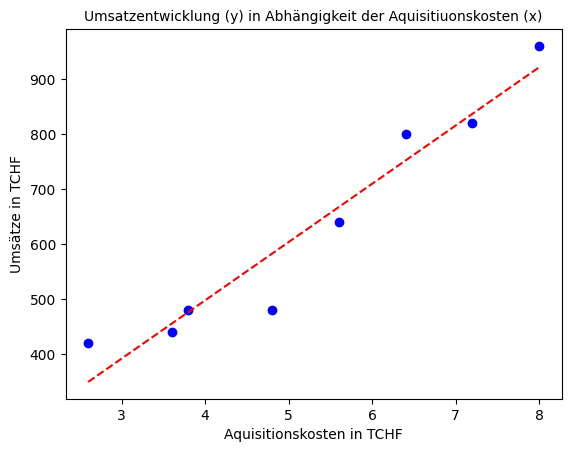

In [40]:
import matplotlib.pyplot as plt

# Darstellung der Datenpunkte als Liniendiagramm
#plt.plot(X, Y, '-o', color='blue')
# a) Darstellung der Datenpunkte als Scatterplot
plt.scatter(X, Y, color='blue')

# b) Darstellung der Regressionsgeraden mit den Parametern und der
# Funktion: stats.linregress(X,Y)
plt.plot(X, m * X + a, '--', color='red')
plt.title("Umsatzentwicklung (y) in Abhängigkeit der Aquisitiuonskosten (x)", fontsize = 10)
plt.xlabel("Aquisitionskosten in TCHF")
plt.ylabel("Umsätze in TCHF")
plt.show()

c) Je grösser die Aquisitionskosten, desto grösser werden die Umsätze. Zudem ist ein wachsender Trend ersichtlich. Der Zusammenhang ist stark positiv. Siehe dazu den in Aufgabe 1 berechneten Korrelationskoeffizienten.

d) Ja, die Kosten haben sich gelohnt.

## Aufgabe 3 - Daten einlesen, Zusammenhang berechnen

In [41]:
import scipy.stats as sci
import numpy as np
import pandas as pd

# a) Einlesen der Daten mit den Parametern: 
#   1) sep:       Trenzzeichen zwischen Spalten
#   2) decimal:   Dezimalzeichen
#   3) index_col: soll ein Index beim Importieren erstellt werden oder nicht
daten = pd.read_csv('Daten/daten_04_3.csv', sep = ';', decimal = '.', index_col = False)

# Spannungsdaten und Stromdaten in Variablen X und Y übernehmen
X = daten['Spannung_U']
Y = daten['Stromstaerke_I']

# b) Trendlinie, Grad des Polynoms ist 1, also eine Gerade
koeffizienten = np.polyfit(X, Y, 1)     # die Koeffizienten (a, b) ermitteln
# optional:
f = np.poly1d(koeffizienten)            # ein Polynom f(x)= ax + b erstellen

# b) Korrelationskoeffizient
korr_koeff = sci.pearsonr(X, Y)
print("Korrelationskoeffizient:", "%.4f " % korr_koeff[0])

# Ausgabe der Koeffizienten und des Regressionspolynoms
print('Koeffizienten =', koeffizienten)
# optional
print("Polynom f(x):", f)


Korrelationskoeffizient: 0.9107 
Koeffizienten = [0.19564851 0.00943375]
Polynom f(x):  
0.1956 x + 0.009434


## Aufgabe 4 - Daten visualisieren

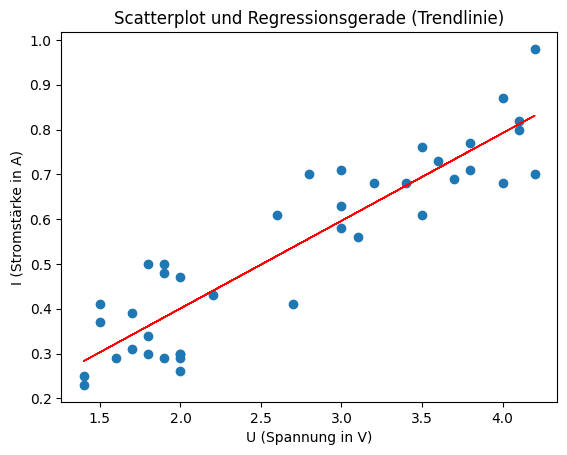

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# a) Visualisierung erstellen
plt.scatter(X, Y)

# Trendlinie, Grad des Polynoms ist 1, also eine Gerade
koeffizienten = np.polyfit(X, Y, 1)     # die Koeffizienten (a, b) ermitteln
f = np.poly1d(koeffizienten)            # ein Polynom f(x)= ax + b erstellen

# b) Trendlinie zum Plot hinzufügen
plt.plot(X, f(X), color = "red", linewidth = 1, linestyle = '-')

# Beschriftungen
plt.title('Scatterplot und Regressionsgerade (Trendlinie)')
plt.xlabel('U (Spannung in V)')
plt.ylabel('I (Stromstärke in A)')

# Grafik anzeigen
plt.show()


c) Wenn die Spannung U erhöht wird, dann wird auch die Stromstärke I grösser. Man erkennt die Fehler in den Messungen, falls es sich um ohmsche Widerstände gehandelt hat. Eigentlich sollten sich die Punkte auf einer Geraden verteilen. Bei einigen Bauelementen ist aber das Verhalten nicht linear. Dies kann auch ein Grund für die Abweichung sein.